## **The script simulates the 1D and 2D heat equation using the finite difference method.** 

The result visualizes how temperature evolves along a rod over time. 

- The heat equation is a mathematical model that describes how heat (or temperature) evolves over time in a medium.   
In 1D, the equation is:
$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}.
$$
- $u(x,t)$ is the temperature at position x and time  t,    
- α is the thermal diffusivity (how fast heat spreads).

The heat equation is solved using the finite difference method, a numerical technique that discretizes time and space into small intervals:
$$
u_{i}^{n+1} = u_{i}^{n} + \frac{\alpha \Delta t}{(\Delta x)^{2}}\left(u_{i+1}^{n} - 2u_{i}^{n} + u_{i-1}^{n}\right)
$$

- $u_{i}^{n}$: Temperature at position $i$ at time $n$.  
- $\Delta t$: Time step  
- $\Delta x$: Spatial step   
   
The simulation generates a temperature matrix (u), where rows represent time steps and columns represent positions.  
Key Outputs:    
The temperature distribution over time, visualized as a series of curves.


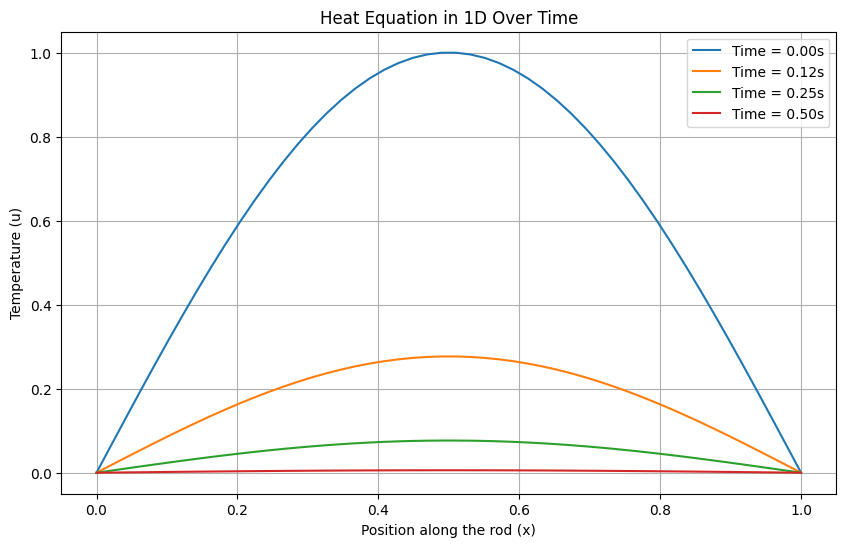

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# firt we define parameters for the heat equation
L = 1.0  # Length of the rod
T = 0.5  # Total simulation time
Nx = 50  # Number of spatial steps
alpha = 1.0  # Thermal diffusivity

# Discretize the spatial and time domains
dx = L / Nx  # Spatial step size
dt = (dx**2) / (2 * alpha) * 0.9  # Stability condition with a safety factor
Nt = int(T / dt)  # Recalculate number of time steps

# Initialize the temperature array
u = np.zeros((Nt, Nx))  # Temperature values (time, space)

# Initial condition: A spike in the center of the rod
x = np.linspace(0, L, Nx)
u[0, :] = np.sin(np.pi * x)

# Time evolution using the finite difference method
for n in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        u[n + 1, i] = (
            u[n, i]
            + alpha * dt / dx**2 * (u[n, i + 1] - 2 * u[n, i] + u[n, i - 1])
        )

time_steps_to_plot = [0, Nt // 4, Nt // 2, Nt - 1]

plt.figure(figsize=(10, 6))
for t in time_steps_to_plot:
    plt.plot(x, u[t, :], label=f"Time = {t * dt:.2f}s")

plt.xlabel("Position along the rod (x)")
plt.ylabel("Temperature (u)")
plt.title("Heat Equation in 1D Over Time")
plt.legend()
plt.grid()
plt.show()



Principal Component Analysis (PCA) is a technique for dimensionality reduction.    
It finds a set of principal components (directions of maximum variance in the data) and projects the data onto these components.   
   
we want to :     
To compress the temperature data (u) by retaining only the most important features (principal components).  

1. Compress:    
PCA reduces the dimensions of u to n_components (e.g., 5).    
2. Reconstruct:   
The compressed data is expanded back to its original size to compare it with the original.    

Key Outputs:    
Compressed representation: Smaller dataset that retains most of the original information.   
Reconstructed data: An approximation of the original dataset from the compressed data.

Mean Squared Error (MSE) after compression: 0.000000


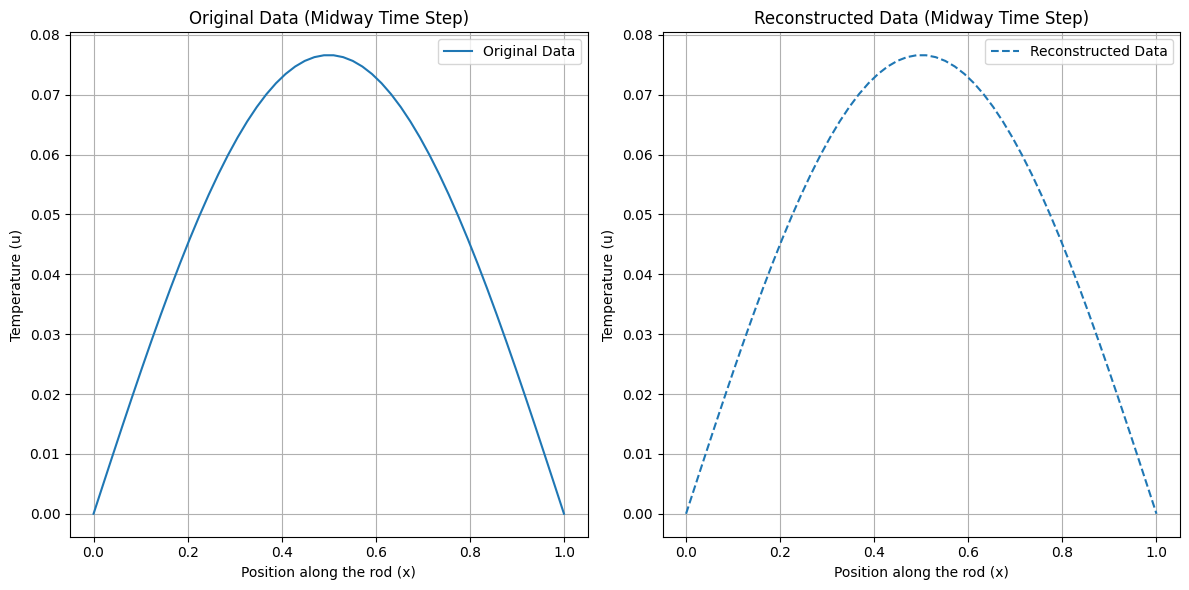

In [19]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Data: Using the results of the heat equation from the previous step
# Assuming 'u' is the temperature matrix with shape (time_steps, spatial_steps)

# Step 1: Apply PCA for Dimensionality Reduction
n_components = 5  # Number of principal components to retain
pca = PCA(n_components=n_components)
u_compressed = pca.fit_transform(u)  # Compressed representation

# Step 2: Reconstruct the data from the compressed representation
u_reconstructed = pca.inverse_transform(u_compressed)

# Step 3: Evaluate Compression Error
mse = mean_squared_error(u, u_reconstructed)
print(f"Mean Squared Error (MSE) after compression: {mse:.6f}")

# Step 4: Visualize Original and Reconstructed Data
time_step_to_plot = Nt // 2  # Midway time step

plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
plt.plot(x, u[time_step_to_plot, :], label="Original Data")
plt.title("Original Data (Midway Time Step)")
plt.xlabel("Position along the rod (x)")
plt.ylabel("Temperature (u)")
plt.grid()
plt.legend()

# Reconstructed data
plt.subplot(1, 2, 2)
plt.plot(x, u_reconstructed[time_step_to_plot, :], label="Reconstructed Data", linestyle='--')
plt.title("Reconstructed Data (Midway Time Step)")
plt.xlabel("Position along the rod (x)")
plt.ylabel("Temperature (u)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()



now we would like to ensure that compression is effective without significant loss of information.  

how do we do that?   
- Reconstruction Error:  
The difference between the original data and the reconstructed data is quantified using Mean Squared Error (MSE).   
MSE close to 0 indicates high-quality reconstruction.    
- Compression Error Over Time:    
The MSE is computed for each time step and plotted to show how compression quality varies with time.

In [ ]:
# Calculate compression error (MSE) for each time step
compression_errors = [
    mean_squared_error(u[n, :], u_reconstructed[n, :]) for n in range(Nt)
]

# Plot the compression error over time
time = np.linspace(0, T, Nt)  # Time axis

plt.figure(figsize=(10, 6))
plt.plot(time, compression_errors, label="Compression Error (MSE)")
plt.xlabel("Time (s)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Compression Error Over Time")
plt.grid()
plt.legend()
plt.show()

# Summary Statistics
print(f"Average Compression Error (MSE): {np.mean(compression_errors):.6f}")
print(f"Maximum Compression Error (MSE): {np.max(compression_errors):.6f}")


## **A numerical simulation of the 2D heat equation using the finite difference method (FDM)**

now lets see how temperature evolves in a 2D domain (like a square plate) over time, modeled by the heat equation:   
$$
\frac{\partial u}{\partial t} = \alpha\left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right)
$$
where:    
- $u(x,y,t)$: Temperature at position $(x,y)$ and time $t$.
- $\alpha$: Thermal diffusivity.
- $\frac{\partial^2 u}{\partial x^2}$ and $\frac{\partial^2 u}{\partial y^2}$: Second derivatives of $u$ with respect to $x$ and $y$, modeling how heat spreads.


- Initial Condition Function  
Defines the initial temperature distribution across the grid.
- Heat Equation Solver  



**Grid Setup:**
- $u$: 2D matrix representing the temperature at each grid point.
- $x$ and $y$: Arrays of grid coordinates.
- $X, Y$: 2D meshgrid created from $x$ and $y$.

**Set Initial Condition:**
- Fill the $u$ matrix with the sine function values.

**Simulation Loop:**
- Loop through `num_steps`, updating the temperature at all grid points each iteration.

**Finite Difference Formula:**
Approximates the second derivatives of temperature using neighboring grid points:
  
$$
u_{i,j}^{n+1} = u_{i,j}^{n} 
+ \alpha \Delta t \left( \frac{u_{i+1,j}^{n} - 2u_{i,j}^{n} + u_{i-1,j}^{n}}{(\Delta x)^{2}}
+ \frac{u_{i,j+1}^{n} - 2u_{i,j}^{n} + u_{i,j-1}^{n}}{(\Delta y)^{2}} \right)
$$

- After applying the formula to all grid points, $u$ is updated for the next time step.

- Returns the grid $(X, Y)$ and the final temperature matrix $(u)$.


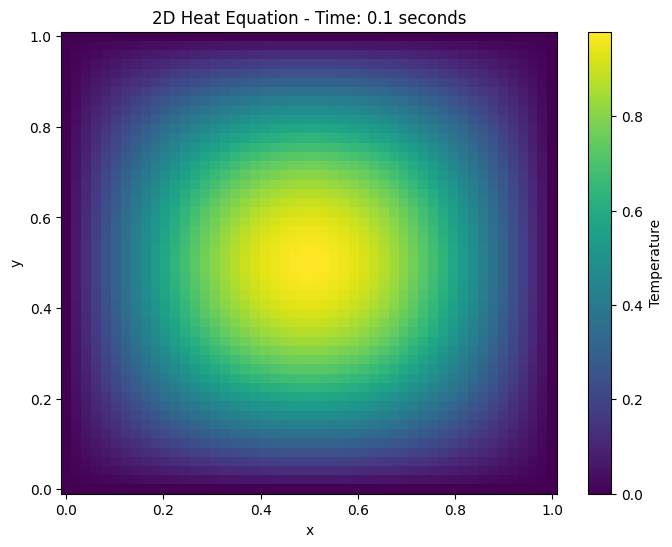

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Lx = Ly = 1.0      # Length of the domain in x and y directions
Nx = Ny = 50       # Number of grid points in x and y
alpha = 0.01       # Thermal diffusivity (rate of heat spread)
T_final = 0.1      # Total simulation time
dt = 0.001         # Time step size
dx = Lx / (Nx - 1) # Spatial step size in x direction
dy = Ly / (Ny - 1) # Spatial step size in y direction

# Initial Condition Function
def initial_condition(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

# Heat Equation Solver
def heat_equation_solver():
    u = np.zeros((Nx, Ny))  # Temperature matrix initialized to zero
    x = np.linspace(0, Lx, Nx)  # x-coordinates of the grid
    y = np.linspace(0, Ly, Ny)  # y-coordinates of the grid
    X, Y = np.meshgrid(x, y)    # Create a 2D grid from x and y
    
    # Initial temperature distribution
    u[:, :] = initial_condition(X, Y)

    # Number of time steps
    num_steps = int(T_final / dt)
    
    # Time evolution loop
    for n in range(num_steps):
        u_new = u.copy()  # Create a copy of the current temperature matrix
        
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                # Update the temperature using the finite difference method
                u_new[i, j] = u[i, j] + alpha * dt * (
                    (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / dx**2 +
                    (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]) / dy**2
                )
        
        u = u_new  # Update the matrix for the next time step

    return X, Y, u


# Run the Simulation
X, Y, u_final = heat_equation_solver()

# Visualization
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, u_final, shading='auto')
plt.colorbar(label='Temperature')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'2D Heat Equation - Time: {T_final} seconds')
plt.show()

pcolormesh:

Creates a 2D color plot of the temperature matrix.   
Each grid point is assigned a color based on its temperature.